# Tarea 1

**Envío del PR inicial: 24.08.2018** 

**Aceptación del PR: 02.09.2018**

## 1

- Escriban una función `newton` que, a partir de `f`, `fprime` y `x0` dados, obtenga una de las raices de la ecuación. Comprueben que funciona con $$f(x)=x^2 -2$$ y $$f'(x) = 2x$$. Tengan suficiente cuidado para que no haya ningún tipo de inestabilidad de tipo en su función.

- Documenta la función de manera adecuada (*docstrings*).

- ¿Cómo se comporta, en términos del número de iterados, la convergencia del método de Newton?

In [1]:
"Método de Newton general para una función f(x) con condición inicial en los Complejos (C)"
function newton(f,fprime,x0,iteraciones)
    for i in 1:iteraciones
        x0 = x0 - f(x0)/fprime(x0)
    end    
return x0
end

newton

Se espera que la raíz de $f(x)=x^2-2$ sea $\sqrt(2)\approx1.414213...$ 

In [2]:
newton(x->x^2-2, x->2*x, 0.01, 10)

1.4142150151017185

In [3]:
It = []
R = []

for i in 18:30
    push!(It,i)
    push!(R,newton(x->x^2-2, x->2*x, 0.000001, i))
end

It_1 = []
R_1 = []

for i in 8:20
    push!(It_1,i)
    push!(R_1,newton(x->x^2-2, x->2*x, 0.001, i))
end

In [4]:
R[6]-sqrt(2)

1.9924600417553506e-5

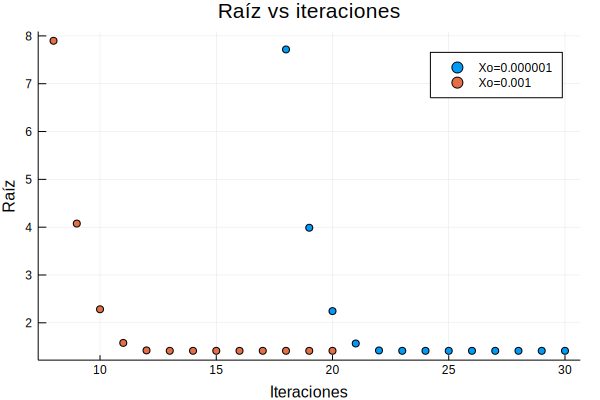

In [7]:
scatter(It, R, ylabel="Raíz", xlabel="Iteraciones", title="Raíz vs iteraciones", label="Xo=0.000001")
scatter!(It_1, R_1, label="Xo=0.001")

Se observa que la convergencia para la función $f(x)=x^2-2$ para la condición incial $x_0=0.000001$, es algo lenta respecto de la misma con condición inicial $x_0=0.001$.

Para $x_0=0.000001$ se tiene un error aceptable $\approx 10^{-5}$ con 23 iteraciones, mientras que para $x_0=0.001$, se tiene un error del mismo orden con solo 13 iteraciones.

En general, la rápida convergencia de la función `newton`, depende no solo del número de iteraciones, si no también de la condición inicial Xo y la función $f(x)$.

## 2

- Usando la función que hicieron en el ejercicio anterior y variando la condición inicial `x0`, de -3 a 3 con pasos suficientemente pequeños, por ejemplo `0.125`, grafiquen la dependencia de la raíz encontrada de la condición inicial para $f(x)=x^2-2$. Para hacer esto, vale la pena que guarden en un vector la raíz obtenida y en otro la condición inicial.

- Repitan el inciso anterior para $g(x) = (x-1)(x-2)(x-3)$, considerando el intervalo $x_0\in[1,3]$ y muchas condiciones iniciales.

In [8]:
C1 = []
R1 = []

for i in -3:0.125:3
    push!(R1, newton(x->x^2-2,x->2*x, i + 0im, 100))
    push!(C1, i)
end

C2 = []
R2 = []

for i in 1:0.025:3
    push!(R2, newton(x->(x-1)*(x-2)*(x-3), x->(x-2)*(x-3)+(x-1)*(x-3)+(x-1)*(x-2), i, 100))
    push!(C2,i)
end

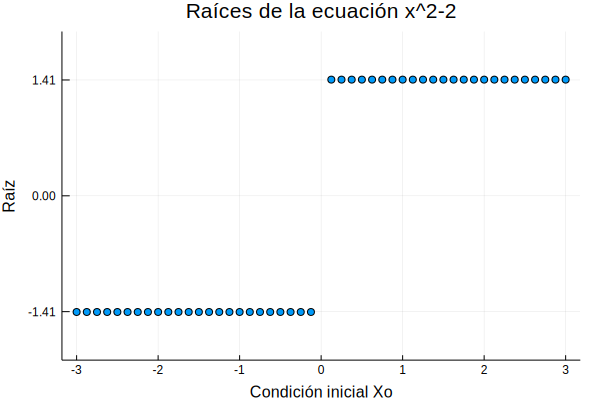

In [9]:
#Pkg.add("Plots")
using Plots 

scatter(C1,real(R1), title="Raíces de la ecuación x^2-2", legend = false)
scatter!(ylims=(-2,2), ylabel="Raíz", xlabel="Condición inicial Xo")
yticks!([-1.41,1.41,0])

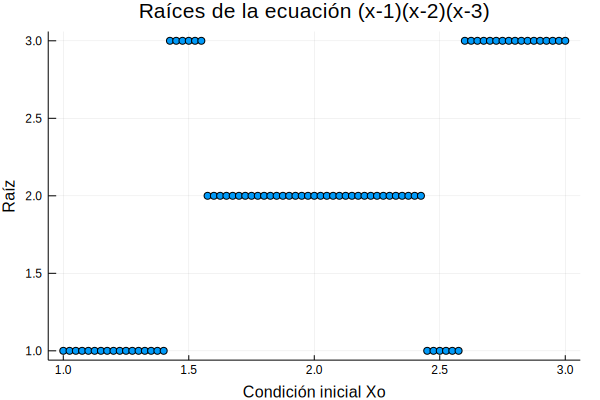

In [10]:
scatter(C2,real(R2), title="Raíces de la ecuación (x-1)(x-2)(x-3)", legend = false)
scatter!(ylabel="Raíz", xlabel="Condición inicial Xo")

## 3

Considerando la función $h(z)=z^3-c$, con $z\in\mathbb{C}$ y $c=1$, utiliza el método de Newton para encontrar las raices en el plano complejo de dicha ecuación. Repite el ejercicio de la dependencia de la raíz encontrada de las condiciones iniciales, graficando en el plano de Argand.

In [11]:
#Raíces de h(z)
println("r1 = ", newton(x->x^3-1,x->3*x^2, complex(1,1), 100))
println("r2 = ", newton(x->x^3-1,x->3*x^2, complex(-1,1), 100))
println("r3 = ", newton(x->x^3-1,x->3*x^2, complex(-1,-1), 100))

r1 = 1.0 + 0.0im
r2 = -0.5 + 0.8660254037844386im
r3 = -0.5 - 0.8660254037844386im


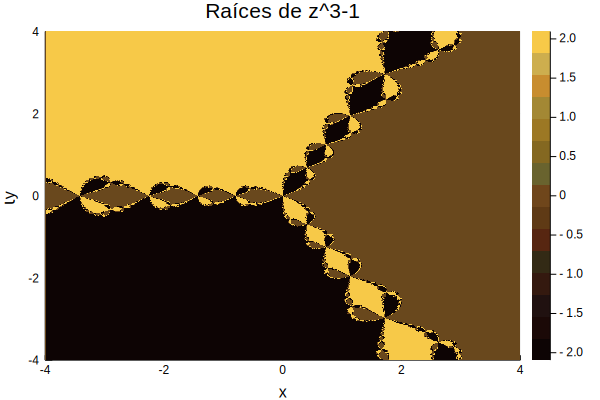

In [12]:
#Pkg.add("ColorSchemes")
using ColorSchemes

i = -4:0.0025:4
j = i
f(i, j) = begin
      angle(newton(x->x^3-1,x->3*x^2, complex(i,j), 100))
  end
contour(i, j, f, fill=true, seriescolor=cgrad(ColorSchemes.leonardo))
contour!(xlabel="x", ylabel="\\iota y", title="Raíces de z^3-1", flabel="ángulo (radianes)")

La escala de color (en radianes) representa el argumento (ángulo respecto al eje real positivo) de los números 
complejos arrojados por la función `newton`.

- Siendo el área café claro, la raíz t.q. $arg(r_1) = 0$ rad,  i.e. $r_1 = 1 + 0i$,
- el área amarilla,          la raíz t.q. $arg(r_2) = 2$ rad,  i.e. $r_2 = -0.5 + 0.86i$,
- y el área café oscuro,     la raíz t.q. $arg(r_3) = -2$ rad, i.e. $r_3 = -0.5 - 0.86i$

Observamos a grandes rasgos que el plano complejo se parte en 3 secciones, donde la función `newton` iterada converje en alguna de las 3 raíces de la ecuación.

## 4

- Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ de una variable (a priori arbitaria), en un punto $x_0$. Para esto, utilizaremos la aproximación de la derivada
que se basa en su definición:

$$ 
f'(x_0) \approx \frac{\Delta f_+}{\Delta x} \equiv \frac{f(x_0+h)-f(x_0)}{h},
$$

lo que requiere de la especificación de `h`. (Este método también se conoce por el nombre de *diferencias finitas*.)

- A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico respecto al valor *exacto*. Ilustren esto en una gráfica del error vs $h$, para $f(x) = 3x^3-2$, en $x_0=1$. 

In [13]:
function derivada_derecha(f,x0,h)
    (f(x0+h)-f(x0))/h
end

derivada_derecha (generic function with 1 method)

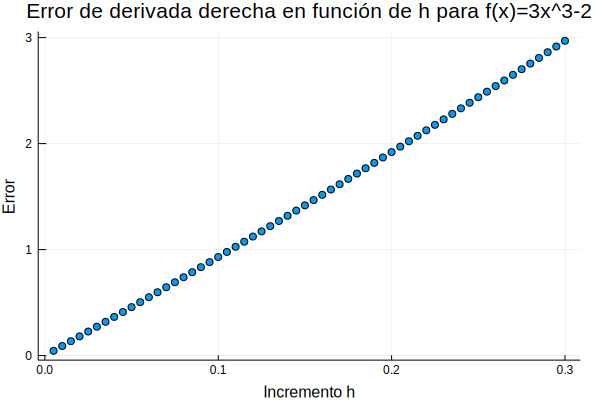

In [14]:
H = []
Error = []

for h in 0.3:-0.005:0.0001
    push!(Error, abs(9 - derivada_derecha(x->3*x^3-2, 1, h)))
    push!(H, h)
end

scatter(H, Error, title="Error de derivada derecha en función de h para f(x)=3x^3-2", legend=false)
scatter!(xlabel = "Incremento h", ylabel = "Error")

- Observamos que la dependencia del error con el incremento es lineal 

$$
Error \sim h
$$

## 5

- Repitan el ejercicio anterior (escribe una función `derivada_simetrica`, usando ahora la aproximación *simétrica* (respecto a la ocurrencia de $h$) de la derivada, dada por

$$
f'(x_0) \approx \frac{ \Delta f_{sym}}{\Delta x} = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
$$

- ¿Por qué es correcto afirmar que la derivada simétrica resulta en una mejor aproximación que la derivada derecha? Argumenten y si es necesario usen argumentos analíticos.

In [15]:
function derivada_simetrica(g,xo,h)
    k = 2*h  #Debido a lo comentado arriba tuve que definir el cociente desde antes
        gprima = (g(xo+h)-g(xo-h))/ k
    return gprima
end

derivada_simetrica (generic function with 1 method)

In [16]:
Hs=[]
errorabs = []
for h in 0.3:-0.005:0.0001
    push!(errorabs, abs(9-derivada_simetrica(x->3*x^3-2,1,h)))
    push!(Hs, h)
end

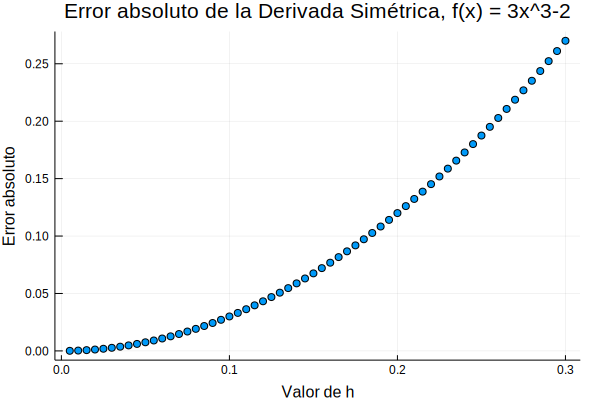

In [17]:
scatter(Hs, errorabs, title = "Error absoluto de la Derivada Simétrica, f(x) = 3x^3-2", xlabel= "Valor de h", ylabel= "Error absoluto", legend=false)

- Observamos que la dependencia del error con el incremento $h$ es cuadrática
$$
Error \sim h^2
$$

- Definiendo al error para la derivada derecha $err_+(x) = f'(x)-f'_+(x)=f'(x)-\frac{f(x+h)-f(x)}{h} = f'(x) - \frac{f(x)+hf'(x)+\frac{h^2}{2}f''(x)+...-f(x)}{h}=-\frac{h}{2}f''(x)+O(h^2)$

$$
err_+(x)\sim-\frac{h}{2}f''(x)
$$

- El error para la derivada simétrica $err_s(x)=f'(x)-f'_s(x)=f'(x)-\frac{f(x+h)-f(x-h)}{2h}=f'(x)-\frac{f(x)+hf'(x)+\frac{h^2}{2}f''(x)+\frac{h^3}{6}f'''(x)+...-(f(x)-hf'(x)+\frac{h^2}{2}f''(x)-\frac{h^3}{6}f'''(x)+...)}{2h}$

$$
err_s(x)=f'(x)-\frac{f(x)+hf'(x)+\frac{h^2}{2}f''(x)+\frac{h^3}{6}f'''(x)+...-f(x)+hf'(x)-\frac{h^2}{2}f''(x)+\frac{h^3}{6}f'''(x)-...)}{2h} 
$$

$$
err_s(x)=f'(x)-\frac{2hf'(x)+\frac{h^3}{3}f'''(x)+...}{2h}=f'(x)-f'(x)-\frac{h^2}{6}f'''(x)+O(h^4)
$$

$$
err_s(x)\sim -\frac{h^2}{6}f'''(x)
$$

# Claramente se tiene que el error de la derivada simétrica es menor que el de la derivada derecha cuando $h\rightarrow 0$ y éso se puede apreciar en las dos gráficas anteriores

## 6

- Definan la función `derivada_compleja` considerando la definición de la derivada dada por:
$$
f'(x_0) \approx \frac{\Delta f_{cmplx}(x_0)}{\Delta x} = \Im\Big(\frac{f(x_0+ i h)}{h}\Big),
$$
donde $\Im$ indica la parte imaginaria del argumento ($i=\sqrt{-1}$). 

- Argumenta (analíticamente) por qué esta definición da tan buen resultado. ¿Hay algún caso en que esta definición puede dar resultados inesperados?

In [18]:
function derivada_compleja(f,x0,h)
    imag(f(x0+h*1im)/h)
end

derivada_compleja (generic function with 1 method)

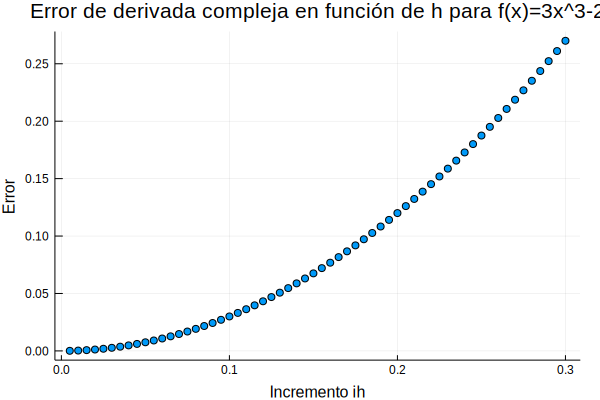

In [20]:
Hc = []
Errorc = []

for h in 0.3:-0.005:0.0001
    push!(Errorc, abs(9 - derivada_compleja(x->3*x^3-2, 1, h)))
    push!(Hc, h)
end

scatter(Hc, Errorc, title="Error de derivada compleja en función de h para f(x)=3x^3-2", legend=false)
scatter!(xlabel = "Incremento ih", ylabel = "Error")

- Expandiendo el Taylor el argumento de la derivada compleja
$$
f'_{complex}(x)=\Im\Big(\frac{f(x+ i h)}{h}\Big)=\Im\Big(\frac{f(x)+ihf'(x)-\frac{h^2}{2}f''(x)-i\frac{h^3}{6}f'''(x)\pm...}{h}\Big)
$$

al tomar la parte imaginaria queda:

$$
f'_{complex}(x)=f'(x)-\frac{h^2}{6}f'''(x)\pm...
$$

siendo entonces el error de la derivada compleja $err_c(x)$:

$$
err_c(x)=f'(x)-f'_{complex}(x)\sim\frac{h^2}{6}f'''(x)
$$

- El error de la derivada compleja también se va a cero como la $h^2$, por eso también es buena opción al igual que la simétrica.